# Prereading

Familiarize yourself with the following.

> Running `! pip install bistring` in a cell on UofT Jupyterhub or google colab will install the module for your instance session so you can run the examples below.


## Floating point numbers 

---

**Floating-point** ${\rm I\!F}$ representation $\quad$ `x` $ = [x]_c \not = x\quad$ the exact **real** ${\rm I\!R}$ number.

- ${\rm I\!F}$ is not ${\rm I\!R}$ as ${\rm I\!F}$ is just a model for ${\rm I\!R}$  and there are limits to how well ${\rm I\!F}$ can approximate ${\rm I\!R}$
- We need to use ${\rm I\!F}$ carefully when we wish to carry out ${\rm I\!R}$-like operations on a computer 

> *Computer numbers are not the same as real numbers, and the arithmatic operations on computer numbers are not exactly the same as those of ordinary arithmetic*. 
>
> *The form of a mathematical expression and the way the expression should be evaluated in practice may be quite different.*
>
> -- James E. Gentle, Statistical Computing


A 64-bit **floating-point number** ${\rm I\!F}$ is 

$$ \pm2^p \times s = \left[ \underbrace{ \begin{array}{|c|} \hline \delta_0 \\ \hline \end{array}}_{\text{sign}}
\underbrace{\begin{array}{|c|c|c|c|c|c|} \hline \delta_1 & \cdots & \delta_{11}  \\ \hline \end{array}}_{\text{$p$ binary representation }}
\underbrace{1.
 \begin{array}{|c|c|c|} \hline \delta_{12}  & \cdots & \delta_{63} \\ \hline \end{array}}_{\text{$s$ binary decimal fraction}} \right]  $$    

which is defined by


- one $\pm$ *sign* bit $\delta_0$
- eleven *exponent* bits $\delta_1,  \cdots, \delta_{11}$ defining  $p = \displaystyle \sum_{i=0}^{10} \delta_{11-i} 2^i - b$ 
- implicit *bias* $b = \sum_0^{9} 2^i = 2^{10}-1 = 1023 = $ `01111111111` is the "middle" of the representation

> - $p$ has $2^{11}=2048$ unique representations with `00000000000` $= 0$ to `11111111111` $= 2047$
>
>
> - $p=0$ is `01111111111` since `01111111111` $-$ `01111111111` $= 0$
>
>
> - `1??????????` $>$ `01111111111` and `0??????????` $\leq$ `01111111111`
>
>
> - $\max p = 1024$ and  $\min p = -1023$


and *significand/mantissa* bits $s = 1.\delta_{12}\cdots\delta_{63} \in [1,2)$ defining base $2$ binary decimal representations $s = 2^0 + \sum_{i=1}^{52} \delta_{11+i} 2^{-i}$ where the implicit *hiddent digit* `1.` is included unless all *exponent bits* are `0`.

> - $\delta_{12}=\delta_{13}=1, \delta_{i>13}=0$ is $s=1.11000_\cdots$ which is $1.75$ in *base $10$*
>
>
> - If *exponent* $p=-1023$ the *hidden bit* "disappears" and the *significand* is changed to $s = \delta_{12}.\delta_{13}\cdots\delta_{63} \in [2^{-51},2)$ so that $s = 2\sum_{i=1}^{52} \delta_{11+i} 2^{-i} = \sum_{i=1}^{52} \delta_{11+i} 2^{-i+1} \neq \sum_{i=1}^{52} \delta_{11+i} 2^{-i}$
>
>
> - This is known as *graceful underflow* and it extends the lower end of the *exponent range* from $p =$ `-1023` to $p =$ `-1023-51 = -1074` thereby extrending the representation towards `0`.

### Examples

---

A floating point number `x` $ = \pm \, 2^p \overbrace{\left(2^0 + \sum_{i=1}^{52} \delta_{11+i} 2^{-i} \right)}^{s}$ facilitates the scientific notation $\pm s \times 2^p$. 

For example, the **range** of $\require{cancel}$$\pm2^p$ is from
- $\pm2^{-1023} \approx \pm$ `1.1125369292536007e-308` to
- $\pm2^{1024} \approx \pm$ `1.7976931348623157e+308`  

When $p >$ `-1023` and the *significand* $s$ is not in *graceful underflow*, the smallest contributing bit in the representation is $2^{-52} \approx $ `2.220446049250313e-16`, which occurs when $\delta_{63}=1$ and $\delta_{12\leq i<62}=0$.

- This means that in this $16^{th}$ (base $10$) decimal position the smallest represntable digit is `2` (not `1`).
- Therefore not every digit at the $16^{th}$ (base $10$) decimal position can be represented exactly correctly
- and only the first 15 (base $10$) decimal*base $10$* *decimal* digits can be exactly correctly

Floating point numbers thus have `resolution=1e-15` which is the smallest accurate increment they can reprsent (or `precision=15` which is decimal position at which this increment occurs) relative to $\pm 2^p$. 


In [5]:
# You can look at the available resolution of floating-point numbers directly:
print(2**-52, ": 15 decimal digits present")
print(2**-100, ": 15 decimal digits present, still")

2.220446049250313e-16 : 15 decimal digits present
7.888609052210118e-31 : 15 decimal digits present, still


In [110]:
# But it's not that there aren't numbers past these significant digits
print("%.9f"%(0.1234567891011121314151617181920), ": first 9 decimal digits")
reason = "the floating point approximation loses precision after 15 decimal digits (and while it 'got lucky' here on the 16th it is wrong by the 17th)"
print("%.20f"%(0.1234567891011121314151617181920), ": "+reason)
# It's that they can't be represented numerically accurately

0.123456789 : first 9 decimal digits
0.12345678910111212989 : the floating point approximation loses precision after 15 decimal digits (and while it 'got lucky' here on the 16th it is wrong by the 17th)


In [22]:
# You can look at the available range directly (and break it):
print(10.**308, ': "Cool", followed by "Not Cool"')
print(10.**309, ': "Not Cool"')

1e+308 : "Cool", followed by "Not Cool"


OverflowError: (34, 'Result too large')

In [ ]:
# play around to find out the range limits and behavior:
#2.**-(1023+52) # every single exponent and significand bit is 0
#2.**-(1023+51) # all exponent bits are 0 but the last significand bit is 1
#2.**-1023 # the first significand bits is 1 and all other significand bits are 0
#2.**1024 # so actually p=1024 is the limit, not p=1023
#2.**1023

In [36]:
import numpy as np
# You can also just look up these specs:
# https://numpy.org/doc/stable/reference/generated/numpy.finfo.html
np.finfo(float)  
# np.finfo(float).resolution, np.finfo(float).precision

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [ ]:
# You can look at the bit string representations as well:
# https://pypi.org/project/bitstring/
! pip install bitstring  # install a package not immediately available
# ! y | pip install bitstring  # should work on google colab?
# not sure UofT JupyterHub allows package installs like this?

In [24]:
# `pip install` will generally install anything you ask it to install.
# More careful version capatiblity management is available with 
# `conda install` or `mamba install` (a faster compatibility solver).
import bitstring # `! pip install bitstring` if this isn't yet installed
# Check out www.h-schmidt.net for an interactive 32-bit floating point demonstration.
# https://stackoverflow.com/questions/16444726/binary-representation-of-float-in-python-bits-not-hex
# i.e., bitstring.BitArray(float=1.0, length=32).bin
print(bitstring.BitArray(float=2.5, length=64).bin)

0100000000000100000000000000000000000000000000000000000000000000


In [25]:
# Here's the graceful underflow from the hidden digit in action:
print(bitstring.BitArray(float=2.**-(1023+0), length=64).bin)
print(bitstring.BitArray(float=2.**-(1023+48), length=64).bin)

0000000000001000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000001000


In [ ]:
# last nonzero exponent bit
print(bitstring.BitArray(float=2**-1022, length=64).bin[1:12])
# hidden bit is still present so all significand bits are 0
print(bitstring.BitArray(float=2**-1022, length=64).bin[12:20])

In [41]:
# all exponent bits are 0
print(bitstring.BitArray(float=2**-1023, length=64).bin[1:12])
# hidden bit disappears and first significand bits now represents 2^0
print(bitstring.BitArray(float=2**-1023, length=64).bin[12:20])

00000000000
10000000


In [40]:
# Here are some interesting floating point numbers:
print("\n1:", bitstring.BitArray(float=1., length=64).bin)
print("0:", bitstring.BitArray(float=0., length=64).bin, "\n")

print("Largest possible 64-bit floating point number 1.7976931348623157e+308:")
print(bitstring.BitArray(float=1.7976931348623157e+308, length=64).bin)
print(" note the ^0^ there... interesting...")


1: 0011111111110000000000000000000000000000000000000000000000000000
0: 0000000000000000000000000000000000000000000000000000000000000000 

Largest possible 64-bit floating point number 1.7976931348623157e+308:
0111111111101111111111111111111111111111111111111111111111111111
 note the ^0^ there... interesting...


### Special Floating-Point ${\rm I\!F}$ "Numbers" 
---

`NaN` and `Inf` are floating-point "numbers", too. It's just that `NaN` and `Inf` have *special reserved representations*. 

Any number with magnitude greater than or equal to $2^{1024}$ is just floating point infinity which is represented by $p=1024$ and $s=1$ (based on the hidden digit). Since there is no number with larger magnitude than infinity, $p=1024$ and $s>1$ is "Not a Number".


In [27]:
type(0.), type(1.), type(2**-52), type(np.inf), type(np.nan) 

(float, float, float, float, float)

In [28]:
print("0     ", bitstring.BitArray(float=0., length=64).bin)
print("1     ", bitstring.BitArray(float=1., length=64).bin)
print("np.inf", bitstring.BitArray(float=np.inf, length=64).bin)
print("np.nan", bitstring.BitArray(float=np.nan, length=64).bin)
# Do you see what the special reserved representations entail?

0      0000000000000000000000000000000000000000000000000000000000000000
1      0011111111110000000000000000000000000000000000000000000000000000
np.inf 0111111111110000000000000000000000000000000000000000000000000000
np.nan 0111111111111000000000000000000000000000000000000000000000000000


In [43]:
# Here are some examples of how Python handles these special numbers.

print("0    :", bitstring.BitArray(float=0, length=64).bin)
print("np.pi:", np.pi)
print("np.pi:", bitstring.BitArray(float=np.pi, length=64).bin)

print("\n np.inf         :", bitstring.BitArray(float=np.inf, length=64).bin)
print(" np.inf + np.pi :", bitstring.BitArray(float=np.inf+np.pi, length=64).bin)
print(" np.inf * np.pi :", bitstring.BitArray(float=np.inf*np.pi, length=64).bin)
print(" np.pi / np.inf :", bitstring.BitArray(float=np.pi/np.inf, length=64).bin)
print("-np.inf         :", bitstring.BitArray(float=-np.inf, length=64).bin)
print(" 10**np.inf     :", bitstring.BitArray(float=10.**(np.inf), length=64).bin)
print(" 10**-np.inf    :", bitstring.BitArray(float=10.**(-np.inf), length=64).bin)

print(" np.inf > np.pi :", np.inf > np.pi)
print(" np.inf < np.pi :", np.inf < np.pi)
print("-np.inf < np.pi :", -np.inf < np.pi)

print("\n np.inf - np.inf :", np.inf-np.inf)
print(" np.inf / np.inf :", np.inf/np.inf)
print(" 0 * np.inf      :", 0*np.inf)

print("\nnp.nan          :", bitstring.BitArray(float=np.nan, length=64).bin)
print("np.inf          :", bitstring.BitArray(float=np.inf, length=64).bin)
print("np.nan + np.pi  :", bitstring.BitArray(float=np.nan+np.pi, length=64).bin)
print("np.nan + np.inf :", bitstring.BitArray(float=np.nan+np.inf, length=64).bin)
print("np.nan < np.pi  :", np.nan < np.pi)
print("np.nan < np.inf :", np.nan < np.inf)

0    : 0000000000000000000000000000000000000000000000000000000000000000
np.pi: 3.141592653589793
np.pi: 0100000000001001001000011111101101010100010001000010110100011000

 np.inf         : 0111111111110000000000000000000000000000000000000000000000000000
 np.inf + np.pi : 0111111111110000000000000000000000000000000000000000000000000000
 np.inf * np.pi : 0111111111110000000000000000000000000000000000000000000000000000
 np.pi / np.inf : 0000000000000000000000000000000000000000000000000000000000000000
-np.inf         : 1111111111110000000000000000000000000000000000000000000000000000
 10**np.inf     : 0111111111110000000000000000000000000000000000000000000000000000
 10**-np.inf    : 0000000000000000000000000000000000000000000000000000000000000000
 np.inf > np.pi : True
 np.inf < np.pi : False
-np.inf < np.pi : True

 np.inf - np.inf : nan
 np.inf / np.inf : nan
 0 * np.inf      : nan

np.nan          : 0111111111111000000000000000000000000000000000000000000000000000
np.inf          : 0111111

The `np.nan` special number is only accessibly through `np.inf` and `np.nan` operations or direct specifications (e.g., as "missing values"). This is preferable since if numerical operations that are not defined we'd prefer for the operation to raise a useful error instead of just returning in `np.nan`.


In [29]:
0. / 0.

ZeroDivisionError: float division by zero

## Numerical Errors

---

### Numerical Overflow

**Overflow** is when $x+|\epsilon| \geq 2^{1024}$ in ${\rm I\!R}$ but **floating-point** representation of the number in $I \!\! F$ is $[x+|\epsilon|]_c = $ `Inf` 

- **Overflow** occurs if the magnitude of a number is greater than the largest representable **floating point number**
    - and either an error or warning is produced or the number is represented as `Inf` (or both) 
    - <u>and the information in the number is lost</u>

In [53]:
10.**309

OverflowError: (34, 'Result too large')

In [47]:
np.finfo(float).max

1.7976931348623157e+308

In [54]:
# Different "types" of floating-point numbers 
# don't necessarily all treat overflow encounters the same way(!)
2. * np.finfo(float).max

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_17195/48851133.py:1: RuntimeWarning: overflow encountered in scalar multiply
  2. * np.finfo(float).max


inf

In [59]:
2. * 1.7976931348623157e+308, type(2. * 1.7976931348623157e+308)
# Note that this does not report an error like `10.**309` did
# And does not provide a warning like `2. * np.finfo(float).max`
# which has type `numpy.float64` 

(inf, float)

In [60]:
# ! pip install bitstring # ! yes y | pip install bitstring
# import bitstring
print(bitstring.BitArray(float=1.7976931348623157e+308, length=64).bin)
print(bitstring.BitArray(float=2*1.7976931348623157e+308, length=64).bin)

0111111111101111111111111111111111111111111111111111111111111111
0111111111110000000000000000000000000000000000000000000000000000


In [48]:
# 1.7976931348623157e+308 is the largest representable floating point number
print(bitstring.BitArray(float=1.7976931348623157e+308, length=64).bin)
print(" ... that ^0^ there ...")
print("                        which is the last digit of the exponent...")

0111111111101111111111111111111111111111111111111111111111111111
 ... that ^0^ there ...
                        which is the last digit of the exponent...


In [49]:
# Here's what happen's if that `0` becomes `1` (so that all exponent bits are `1`)
print('   1.7976931348623157e+308 + 1e+292')
print("= ", bitstring.BitArray(float=1.7976931348623157e+308, length=64).bin)
print(" +", bitstring.BitArray(float=2**1023 + 2**1022, length=64).bin)
print('= ', 1.7976931348623157e+308 + 2**1023)
print("= ", bitstring.BitArray(float = 1.7976931348623157e+308 + 2**1022, length=64).bin)
print(" no zero here ^ any more")
print("    but also all the significand bits don't matter any more and get set to 0")

   1.7976931348623157e+308 + 1e+292
=  0111111111101111111111111111111111111111111111111111111111111111
 + 0111111111101000000000000000000000000000000000000000000000000000
=  inf
=  0111111111110000000000000000000000000000000000000000000000000000
 no zero here ^ any more
    but also all the significand bits don't matter any more and get set to 0


In [50]:
# Of course, so long as the value has not yet reached infinity, 
# then all the *significand* digits are tracked...
# here just picking some arbitrary numbers to add together... 
print(" ", bitstring.BitArray(float=.89e+308, length=64).bin)
print("+", bitstring.BitArray(float=.89e+308, length=64).bin)
print("=", bitstring.BitArray(float=.89e+308+.89e+308, length=64).bin)
print("=", .89e+308+.89e+308)

  0111111111011111101011110101111110001101000110010111010001111001
+ 0111111111011111101011110101111110001101000110010111010001111001
= 0111111111101111101011110101111110001101000110010111010001111001
= 1.78e+308


In [51]:
# because *significand* bits are retained when representing `Inf`
# since they are used to represent `NaN`
print("0     ", bitstring.BitArray(float=0., length=64).bin)
print("1     ", bitstring.BitArray(float=1., length=64).bin)
print("np.inf", bitstring.BitArray(float=np.inf, length=64).bin)
print("np.nan", bitstring.BitArray(float=np.nan, length=64).bin)

0      0000000000000000000000000000000000000000000000000000000000000000
1      0011111111110000000000000000000000000000000000000000000000000000
np.inf 0111111111110000000000000000000000000000000000000000000000000000
np.nan 0111111111111000000000000000000000000000000000000000000000000000


### Numerical Underflow

**Underflow** is when $x \neq 0$ in ${\rm I\!R}$ but ***floating-point*** representation of the number in $I \!\! F$ is $[x]_c = 0$ 

- ***Underflow*** means the number is closer to `0` than the smallest representable non zero ***floating-point*** number
     - and either an error or warning is produced or the number is represented as a `0.0` (or both) 
     - <u>and the information in the number is lost</u>


***Underflow*** to `0.0` is particularly concerning because unlike an ***overflow*** to `np.inf` it can easily go unnoticed...

- ***overflow*** is not "forgotten about" since `Inf + c = Inf` is arithmetically persistent 
- whereas ***underflow*** can be "forgotten about" since `0.0 + c = c` is not
    - and constantly checking for ***underflow*** error or warning messages isn't free...


In [97]:
# The largest number number representable using graceful underflow is
print(np.nextafter(2**-1022., 0.))
print(bitstring.BitArray(float=2**-1022., length=64).bin)
print(bitstring.BitArray(float=np.nextafter(2**-1022., 0.), length=64).bin)

2.225073858507201e-308
0000000000010000000000000000000000000000000000000000000000000000
0000000000001111111111111111111111111111111111111111111111111111


In [88]:
np.nextafter(0., 1.), 2.**(-1023)*(2.**-51)  # graceful underflow

(5e-324, 5e-324)

In [93]:
print(np.nextafter(0., 1.))
print(bitstring.BitArray(float=np.nextafter(0., 1.), length=64).bin)

5e-324
0000000000000000000000000000000000000000000000000000000000000001


In [89]:
2.**(1023), np.finfo(float).max  #  2.**(1023) * s(=1.111...)

(8.98846567431158e+307, 1.7976931348623157e+308)

In [87]:
2.**(-1023), 2.**(-1023)* 2**-51  # graceful underflow limit

(1.1125369292536007e-308, 5e-324)

In [98]:
2.**(-1023)* 2**-52  # numerical underflow

0.0

In [92]:
# or this is the same as
# np.finfo(float).max is 1.
#.7976931348623157e+308
1.7976931348623157e-308 * 2**-53  # numerical underflow  

0.0

In [70]:
print(' ', '1.7976931348623157e-308 * 1.7976931348623157e-308')
print('=', bitstring.BitArray(float=1.7976931348623157e-308, length=64).bin, '*\n ', 
      bitstring.BitArray(float=1.7976931348623157e-308, length=64).bin)
print('=', 1.7976931348623157e-308*1.7976931348623157e-308)
print('=', bitstring.BitArray(float=1.7976931348623157e-308*1.7976931348623157e-308, length=64).bin)

  1.7976931348623157e-308 * 1.7976931348623157e-308
= 0000000000001100111011010100001011101100100010000101110110011101 *
  0000000000001100111011010100001011101100100010000101110110011101
= 0.0
= 0000000000000000000000000000000000000000000000000000000000000000


## Numerical Roundoff Error

**Roundoff error** is the fact that ${\rm I\!F}$ representation **floating-point** $\quad$ `x` $ = [x]_c \not = x\quad$ the exact **real** ${\rm I\!R}$ number.


In [113]:
# And, again, it's not that there aren't numbers past the available resolution
print("%.9f"%(0.1234567891011121314151617181920), ": first 9 decimal digits")
reason = "the floating point approximation loses precision after 15 decimal digits (and while it 'got lucky' here on the 16th it is wrong by the 17th)"
print("%.20f"%(0.1234567891011121314151617181920), ": "+reason)
# It's that numerical precision past these digits is not representable by floats
# except for the few numbers exactly representable by the floating point defintion

0.123456789 : first 9 decimal digits
0.12345678910111212989 : the floating point approximation loses precision after 15 decimal digits (and while it 'got lucky' here on the 16th it is wrong by the 17th)


As we have already seen $[x]_c \approx x$, but now consider the following.

$1.234567891011121 \times 10^{300} + 10000000000$ does not have an exact ***floating-point*** number representation. In fact, the closest representation $[\cdot]_c$ number available in the ***floating-point*** number system is just the first number itself.

$$[1.2345678910111213 \times 10^{300} + 10^{10}]_c = 1.234567891011121 \times 10^{300}$$

which has a ***roundoff error*** of $10000000000$ relative to the actual value of the addition.

In [122]:
# the closest computer representation of this number has a roundoff error of 100000000000
1.234567891011121e+300 + 10000000000

1.234567891011121e+300

This happens because the **floating-point** *significand* represents 16 significant (base 10) decimial digits (and only the first 15 precicely) which correspond to the first 16 significant digits of $2^{p}$. The limited *precision* of the *signifcand* means the floating point representation of `1.234567891011121e+300` is only numerically accurate up to the number `1234567891011121` followed by 285 zeros and the *significand** cannot represent any digits within the 285 zeros.
The floating point number $[1.2345678910111213 \times 10^{300} + 10^{10}]_c = 2^{p}\times s$ is trying to add numeric values at the 291st (base 10) decimal position. This can neither be reflected in $2^{p}$ nor *significand* $s$. 

Adding `10000000000` to that is way down past the 16 most significant digits does not contributed any significant digits and is immediately lost in the ***floating-point*** representation.

Any time the magnitudes of the smallest significant digits for two floating-point numbers differ, their sum cannot include smallest significant digits of the smaller magnitude floating-point number.

1. "Big" ***floating-point*** numbers dominate and overshadow "small" floating-point numbers making the contributrion of "small" floating-point so insignificant that they get "lost"


2. ***Floating-point*** representations do not have enough precision to track small decimal values in the presense of much larger magnitude numbers


3. Only similiar magnitude ***floating-point*** numbers can be arithmetically combined without inducing **roundoff** error

> The first problem of the week 5 homework in examined ***roundoff error*** in the familar context of *addition*.  You may have been surprised to find out that even such simple and routine calculation are actually at grave risk for these numerical maladies when ${\rm I\!F}$ is not used carefully when modeling calculations in ${\rm I\!R}$.




# Lecture

First hour of class

In [58]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Sequential Summation



The [machine-epsilon](https://stackoverflow.com/questions/9528421/value-for-epsilon-in-python/9528651) $\epsilon_{machine}$ bound guarantees floating point representation $[x]_c = x(1 + \epsilon) \textrm{ for } |\epsilon| \leq \epsilon_{machine}$

In [31]:
np.finfo(float).eps, 2**-52  # 2**-52 smallest value representable in the _significand_

(2.220446049250313e-16, 2.220446049250313e-16)

$
\begin{align*}
\quad\quad\quad\quad\quad\quad\quad [x_1+x_2]_c = {} & (x_1+x_2)(1+\epsilon_1)\\
[(x_1+x_2)(1+\epsilon_1) + x_3]_c = {} & ((x_1+x_2)(1+\epsilon_1)+x_3)(1+\epsilon_2)\\
[((x_1+x_2)(1+\epsilon_1) + x_3)(1+\epsilon_2) + x_4]_c = {} & (((x_1+x_2)(1+\epsilon_1)+x_3)(1+\epsilon_2)+x_4)(1+\epsilon_3)\\
\vdots \; {} & \\
\left[\sum_{i=1}^n x_i\right]_c = {} & \left[(x_1+x_2)\prod_{i=1}^{n-1} (1+\epsilon_i)\right] + \left[x_3 \prod_{i=2}^{n-1} (1+\epsilon_i)\right] + \cdots + \left[x_n(1+\epsilon_{n-1})\right]\\
\text{drop higher order terms} \quad \Longrightarrow \quad \approx {} & (x_1+x_2)\left(1+\sum_{i=1}^{n-1} \epsilon_i\right) + x_3 \left(1 + \sum_{i=2}^{n-1} \epsilon_i\right) + \cdots + x_n(1+\epsilon_{n-1})
\end{align*}
$

Considering $\epsilon_i$ to be a random variable then $\textrm{Var}\left[ \sum_{i=k}^{n-1} \epsilon_i \right]$ increases as $k$ decreases and the sums are larger meaning that $x_1+x_2$ can be more affected by numerical error than $x_3$, etc.

$
\begin{align*}
\color{white}{[((x_1+x_2)(1+\epsilon_1) + x_3)(1+\epsilon_2) + x_4]_c} = {} & \underset{\text{true value}}{\sum_{i=1}^{n} x_i} + \underbrace{\sum_{j=1}^{n-1} \left(\epsilon_j\sum_{i=1}^{j+1}x_i\right)}_{\text{numerical error}}
\end{align*}
$

which shows that numerical error $\epsilon_j\sum_{i=1}^{j+1}x_i$ at step $j+1$ depends multiplicatively on the current cumulative sum to the best "order of operations" is to add smaller terms together first so the numerical error from each $\epsilon_j$ is smaller since $\sum_{i=1}^{j+1}x_i$ is smaller.

Numerical error compounds just as like with **symplectic intgration** so the approximation improves by sequentially reducing error accumulation. In the case of summation adding small numbers in a sequence first would help achieve this objective.
    

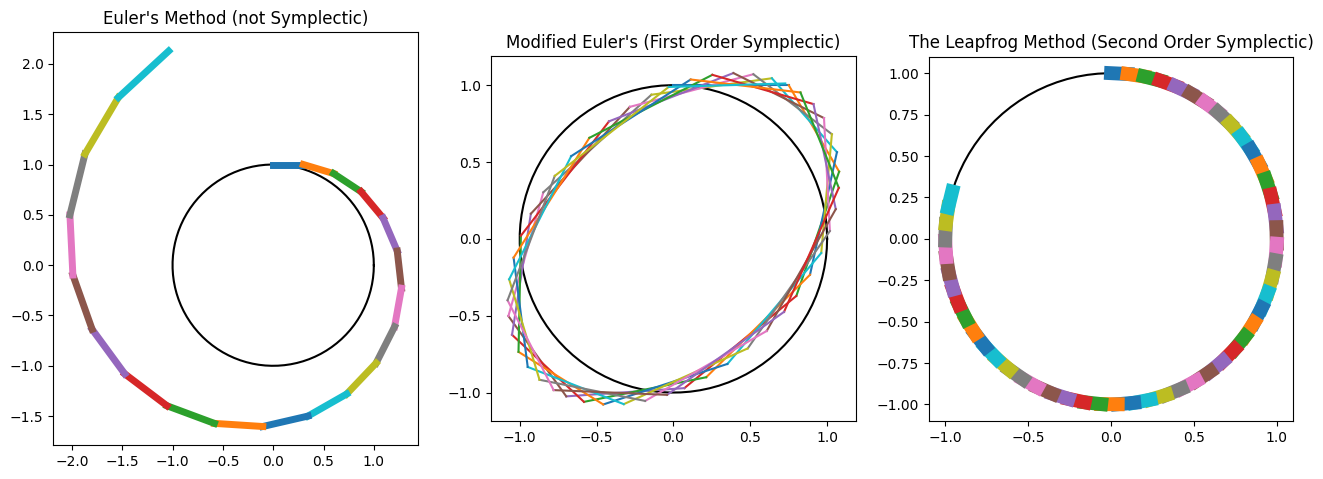

In [2]:
t = np.linspace(0,2*np.pi, 100)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8)) 

for i in range(3):
    ax[i].plot(np.cos(t), -np.sin(t), 'k')
    ax[i].set_aspect('equal', adjustable='box')
    
ax[0].set_title("Euler's Method (not Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .3
for i in range(20):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t
    ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=5) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon 

ax[1].set_title("Modified Euler's (First Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .75
for i in range(50):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    ax[1].plot([theta_t, theta_t_e], [v_t, v_t_e]) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
    
ax[2].set_title("The Leapfrog Method (Second Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .1
for i in range(50):
    v_t_e = v_t - epsilon / 2 * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    v_t_e = v_t_e - epsilon / 2 * theta_t_e
    ax[2].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=10) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon

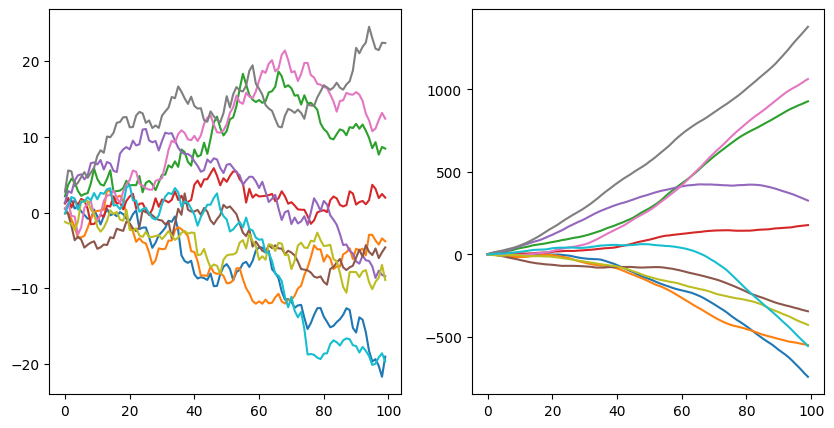

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) 

for i in range(10):
    x = stats.norm().rvs(100)
    ax[0].plot(x.cumsum())
    ax[1].plot(x.cumsum().cumsum())    

Sequential addition is not just the variance at endpoint of **Brownian motion processes**

- $\textrm{Var}[\sum_{i=1}^n X_i] = \sum_{i=1}^n\textrm{Var}[X_i]$

rather, it's the variance at endpoint of the cumulative summation process of a **Brownian motion processes**

- $\textrm{Var}[\sum_{i=1}^n \sum_{j=i}^i X_i] = \sum_{i=1}^n \sum_{j=i}^i \textrm{Var}[X_i]$


## The `log` trick

---

Using a **Taylor series approximation** of a function (as demonstrated in the homework for this week) is a useful trick from a numerical perspective since it can achieve the maximal limits of the available numerical accuracy of floating point numbers as a finite summation. 

But these limits of numerical accuracy are not just `resolution=1e-15` (or `precision=15`) but also `0` and $\pm$ `np.inf`. Namely, **numeric overflow** and **numeric underflow**. Working on a $\log$ scale is attractive since on this scale

$$\text{multiplication $\longrightarrow$ addition} \quad\quad\text{ and }\quad\quad \text{division $\longrightarrow$ subtraction}$$

and adding and subtracting numbers will not drive computations towards the upper and lower computation bounds.

> The "continuous factorial" gamma functions `scipy.special.gammaln` and `scipy.special.loggamma` functions and all `stats.dist.logpdf` functions exist for  exactly this purpose.

Of course computation may need to be exponentiated to return to the original scale, but just because a computation ***underflows*** or ***overflows*** on the original scale does not mean the calculation re-expressed on a log scale and subsequently exponentiation back into the original scale will as well.

> For example any function $f$ on $[0,1]$ may be approximated to arbitrary accuracy with ***Bernstein polynomials*** $p_{mk}(x)$
> 
> $$f(x) \approx \sum_{k=0}^m f\left(\frac{k}{m}\right) p_{mk}(x) \quad \text{ with }$$
>
> $$\begin{align*}
p_{mk}(x) = {} & \left(\begin{array}{c}m\\k\end{array}\right) x^k (1-x)^{m-k} = \exp\left(\log \left(\frac{m!}{(m-k)!k!}\right) + k \log(x) + (m-k)\log(1-x) \right)\\
 = {} & \exp\left(\log\left(\prod_{j=1}^m j \right) - \log\left(\prod_{j=1}^{m-k} j\right) - \log\left(\prod_{j=1}^k j\right) + k \log(x) + (m-k)\log(1-x) \right)\\
 = {} & \exp\left(\sum_{j=m-k\textrm{ or }k}^m \log\left( j \right) - \sum_{j=1}^{k\textrm{ or }m-k} \log\left( j\right) + k \log(x) + (m-k)\log(1-x) \right)
\end{align*}$$
>
> where working on the $\log$ scale avoids producing large numbers that result in ***numeric overflow*** (or **numeric underflow** in the reciprocal), greatly extending the domain of computational feasibility.


In [92]:
# Part of the trick above is to just cancel where you can first
# - and we can see that working in the Metropolis-Hastings below
# - but summing on log scales is still going to provide accuracy
#   for the reasons we'll next discuss after this example

# Metropolis-Hastings requires the ratio of likelihoods
n = 1000
x = stats.norm().rvs(n)

proposal,current = 1,0
stats.norm(loc=proposal).pdf(x).prod()/stats.norm(loc=current).pdf(x).prod()

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_8328/3899186996.py:11: RuntimeWarning: invalid value encountered in scalar divide
  stats.norm(loc=proposal).pdf(x).prod()/stats.norm(loc=current).pdf(x).prod()


nan

In [89]:
(stats.norm(loc=proposal).pdf(x)/stats.norm(loc=current).pdf(x)).prod()

5.956977675063519e-231

In [90]:
np.exp((stats.norm(loc=proposal).logpdf(x) - stats.norm(loc=current).logpdf(x)).sum())

5.956977675063795e-231

In [91]:
np.exp(sum(sorted((stats.norm(loc=proposal).logpdf(x) - stats.norm(loc=current).logpdf(x)))))

5.956977675078695e-231

## The density of ${\rm I\!F}$

In additition to avoiding reaching the **overflow** and **underflow** limits of computational tractibility, performing computations on a $\log$ scale can even reduce **roundoff error**. 

### ${\rm I\!F}$ is not *dense* like ${\rm I\!R}$, it's *exponentially sparse* 

$\text{For integer $p$ such that $|p| \leq 1023 \quad $ and $\quad \underset{\textrm{floating-point representation}}{y = 2^p\times(1 + \sum_{i=1}^{52} b_i2^{-i})}$}$ 

the next closest larger number is 
$$
\begin{align*}
y_{next} ={}&  2^p\times(1 + \sum_{i=1}^{52} b_i 2^{-i} + \overset{2^{-52}}{\epsilon_{machine}})\\
 ={}& y + 2^{p-52}\\
 ={}& y + u\quad\text{ where }\quad u = 2^p \times 2^{-52} \color{gray}{\text{ (or $2^{-1023} \times 2^{-51}$ during graceful underflow)}}\\
&\quad\quad\quad\quad\quad\quad\;\; \color{blue}{\text{$u$ is called the "ulp" ("unit in the last place")}}
\end{align*}$$


**Absolute numerical accuracy** is lost proportionally to the "magnitude" of the number $y$ being represented, meaning, the $2^p$ of it's floating point representation. The larger $y$ is, the larger $p$, and the larger the "ulp", so the farther away $y_{next}$ is from $y$. Unlike the ***real numbers*** ${\rm I\!R}$ as ***floating point numbers*** ${\rm I\!F}$ grow (exponentially) larger they become ***exponentially sparse***


> In base $10$ representation where $10^q = 2^p$ and $2^{-52} \approx 10^{-16}$ <font style="color:gray">(or $2^{-51} \approx 10^{-16}$)</font>
> the smallest possible increase in $y \in {\rm I\!F}$ that is reprsentable in ${\rm I\!F}$ is 
$u = y_{next} - y \approx 10^{q-16}$.
> 
> **Resolution** `1e-15` (or **precision** `15`) means accuracy in the representation  is up to $10^{q-15}$ 
>
> - For $y \approx 10^q \quad \longrightarrow \quad y_{next}-y\approx 10^{q-16}$
> - $y' \approx 10^{q}\times10^k \quad \longrightarrow \quad y'_{next}-y'\approx 10^{q-16}\times 10^k$ 
>
> ${\rm I\!F}$ is not ***dense*** like ${\rm I\!R}$, it's ***exponentially sparse***...
>
> - The larger the ***floating-point*** number, the farther away the nearest representable number is
> - Conversely, ***floating-point*** numbers therefore have the ***highest density*** the closer they are to `0.0`
>    - <font style="color:gray">And this is further enhance through ***Graceful Underflow***</font>



Because **floating-point representations** are exponentially sparse, the closer a number is to `0` (up to the point of **numeric underflow**) the better **absolute numerical accuracy**. We should therefore look to perform numeric computations closer to `0`, and working on $\log$ scale facilitates this.



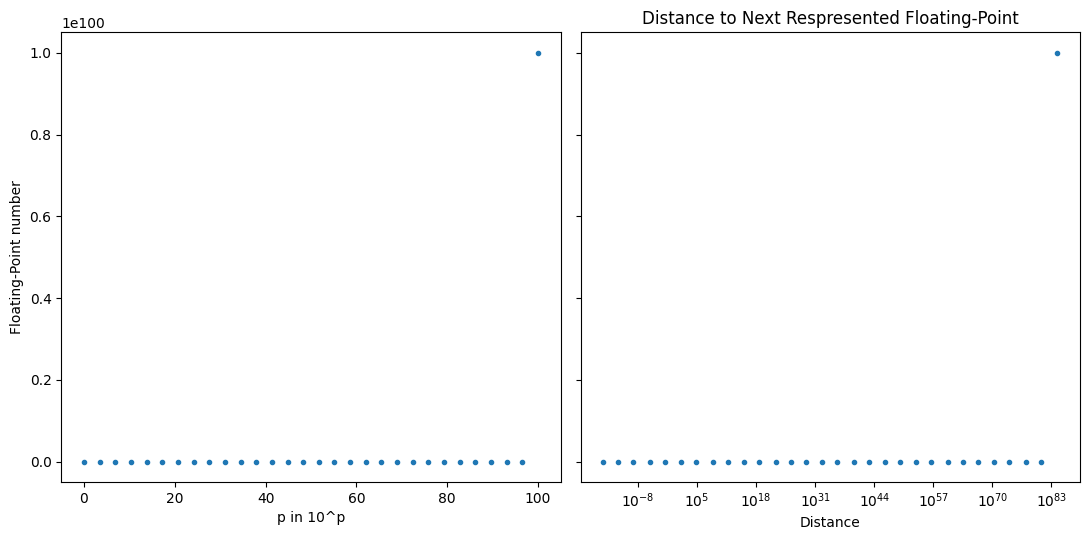

In [30]:
# Exponentially sparse numbers are so far away you can't even visualize them
n,p = 30, 100; grid = np.logspace(start=0, stop=p, num=n, base=10.0)
fig, ax = plt.subplots(nrows=1, ncols=2, sharey='row', figsize=(11,5.5)) 
ax[0].plot(np.log10(grid), grid, '.')
# ax[0].set_yscale('log')  # http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/ #fig.yscale('log')# https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python # https://matplotlib.org/stable/tutorials/introductory/pyplot.html#logarithmic-and-other-nonlinear-axes
ax[0].set_ylabel('Floating-Point number')
ax[0].set_xlabel('p in 10^p')
ax[1].plot(np.spacing(grid), grid, '.')  # https://numpy.org/doc/stable/reference/generated/numpy.spacing.html#numpy.spacing 
ax[1].set_xlabel('Distance')
ax[1].set_title('Distance to Next Respresented Floating-Point')
ax[1].set_xscale('log'); 
plt.tight_layout()  

In [28]:
# https://numpy.org/doc/stable/reference/generated/numpy.nextafter.html#numpy.nextafter
# np.nextafter: "Return the next floating-point value after x1 towards x2, element-wise"
for starting_float in [0., 1e-100, 1e-30, 1., 10., 1e+10, 1e+20, 1e+30, 1e+100, 1.7976931348623157e+307]:
    print("The very next most closest larger float to...")
    distance_to_next_float = np.nextafter(starting_float, np.inf) - starting_float
    print(starting_float, "is larger by\n", distance_to_next_float, "\n")
    

The very next most closest larger float to...
0.0 is larger by
 5e-324 

The very next most closest larger float to...
1e-100 is larger by
 1.2689709186578246e-116 

The very next most closest larger float to...
1e-30 is larger by
 1.7516230804060213e-46 

The very next most closest larger float to...
1.0 is larger by
 2.220446049250313e-16 

The very next most closest larger float to...
10.0 is larger by
 1.7763568394002505e-15 

The very next most closest larger float to...
10000000000.0 is larger by
 1.9073486328125e-06 

The very next most closest larger float to...
1e+20 is larger by
 16384.0 

The very next most closest larger float to...
1e+30 is larger by
 140737488355328.0 

The very next most closest larger float to...
1e+100 is larger by
 1.942668892225729e+84 

The very next most closest larger float to...
1.7976931348623158e+307 is larger by
 2.4948003869184e+291 



In [33]:
# Also "big" numbers only go up to e+308 
# but "small" numbers have more range down to e-324 due to _graceful underflow_
np.finfo(float).max,\
2.**((2**11-1-1)-(2**10-1))*(2-2**(-52)),\
np.nextafter(0,1),\
2**(-2**10+1),\
2**(-2**10+1)*2**(-51)

(1.7976931348623157e+308,
 1.7976931348623157e+308,
 5e-324,
 1.1125369292536007e-308,
 5e-324)

In [40]:
import bitstring
print("largest with graceful underflow", np.nextafter(2**(1-1023),0.)) 
print(bitstring.BitArray(float=np.nextafter(2**(1-1023),0.), length=64).bin)
print("smallest no graceful underflow ", 2**(1-1023))
print(bitstring.BitArray(float=2**(1-1023), length=64).bin)
print("smallest no graceful underflow ", np.nextafter(2**(1-1023),1.), 
      "and nonzero signifcand")
print(bitstring.BitArray(float=np.nextafter(2**(1-1023),1.), length=64).bin); 

largest with graceful underflow 2.225073858507201e-308
0000000000001111111111111111111111111111111111111111111111111111
smallest no graceful underflow  2.2250738585072014e-308
0000000000010000000000000000000000000000000000000000000000000000
smallest no graceful underflow  2.225073858507202e-308 and nonzero signifcand
0000000000010000000000000000000000000000000000000000000000000001


## Catastrophic Cancellation 
---

Any time a ***floating-point*** representation $[\cdot]_c$ is wrong information is lost

In [41]:
1e+300 - (1e+300 + 100000000000.) 
# That's extra weird/bad because `100000000000.` 
# can of course be represented as a floating number

0.0

In [42]:
100000000000. 
# plus it's a really big number... seems strange we can't keep track of it...

100000000000.0

What happened above is called **catastrophic cancellation** and it is distinct from **underflow** 

- In **underflow** a number that is closer to $0$ than the smallest representable number is assigned a value of `0.0`
- In **catastrophic cancellation** the information is lost prior to arriving at `0.0`


The floating point reprsentable information `100000000000` above is lost before the subtraction is even attempted because it cannot be kept track of relative to the significant digits in `1e+300`... It *WOULD have worked* if it had been done it like this:

In [47]:
1e+300 - 1e+300 + 100000000000

100000000000.0

In [49]:
# roundoff error
np.exp(1e-15), np.exp(1e-16)

(1.000000000000001, 1.0)

In [56]:
# catastrophic cancellation
f = lambda x :(np.exp(x)-1)/x
# roundoff error THEN catestrophic cancellation
#          ^^^^^      ^^^^^^^^^^^^ 
f(1e-10),  f(1e-15),  f(1e-16)

(1.000000082740371, 1.1102230246251565, 0.0)

In [57]:
# The pre-lecture reading material referred to this as
# > "underflow in the `np.exp` algorithm in the sense that
# >  `np.exp(x)` becomes `np.exp(0)` for very small non-zero values of x"

# But now we can see that in fact the final collapse of this computation
# is due to catastrophic cancellation as opposed to any "underflow"


**Catastrophic cancellation** occurs when<br>two oppositely signed large magnitude numbers are reprsented with same absolute magnitude due to **roundoff error**

$$x_1+x_2 \approx [x_1+x_2]_c \neq 0 \quad \text{ becuase } \quad |x_1| \not = |x_2| \quad \text{ but } \quad [x_1]_c + [x_2]_c = 0 \quad \text{because } \quad [|x_1|]_c = [|x_2|]_c$$

The true difference <u>can be</u> sufficiently represented as a **floating-point** number exactly, but it wasn't...

The **machine-epsilon** perspective characterizes **catastrphic cancelation** as

$$0 = [x_1]_c - [x_2]_c = x_1(1+\epsilon_1) - x_2(1+\epsilon_2) =  \underbrace{x_1 - x_2}_{\not = 0} + \underbrace{x_1\epsilon_1- x_2\epsilon_2}_{\textrm{must be } -(x_1-x_2)} \overset{since}{=} 0$$

And this can occur only if the true difference $x_1 - x_2$ and the numerical error $x_1\epsilon_1- x_2\epsilon_2$ have identical magnitudes 

$$\textrm{so } |x_1| \text{ and } |x_2| \quad \text{ must be large } \quad 
\textrm{and } |x_1 - x_2| \quad \text{ must be small } \quad \textrm{so }  |x_1\epsilon_1- x_2\epsilon_2| = |x_1 - x_2|$$

given that **machine-epsilon** and hence $\epsilon_1$ and $\epsilon_2$ have relatively small magnitudes

